## 1

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, regexp_replace
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.feature import VectorAssembler, Imputer
from pyspark.ml.tuning import RandomizedSearchCV
from pyspark.sql.functions import rand

ImportError: cannot import name 'RandomizedSearchCV' from 'pyspark.ml.tuning' (/usr/local/lib/python3.11/dist-packages/pyspark/ml/tuning.py)

In [ ]:
spark = SparkSession.builder.appName("FashionDatasetML").getOrCreate()

In [ ]:
data=pd.read_csv('/content/FashionDataset.csv')
data.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [ ]:
data.shape

(30758, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [ ]:
data.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

In [ ]:
data.rename(columns={'Deatils':'Details'})


,Unnamed: 0,BrandName,Details,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...,...
30753,21,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,22,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,23,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,24,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [ ]:
data.isna().any()


,0
Unnamed: 0,False
BrandName,False
Deatils,False
Sizes,False
MRP,False
SellPrice,False
Discount,False
Category,False


In [ ]:
df=data

In [ ]:
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [ ]:
df.Sizes.unique()


array(['Size:Large,Medium,Small,X-Large,X-Small', 'Size:34,36,38,40',
       'Size:Large,X-Large,XX-Large', ..., 'Size:3,8', 'Size:36,41',
       'Size:4,4.5,8.5'], dtype=object)

In [ ]:

df.replace('Nan',np.nan,inplace = True)
df.dropna(axis=0,inplace=True)
df['Sizes']=df['Sizes'].str.replace('Size:',' ')
df['Discount']=df['Discount'].str.replace('% off','')
df['MRP']=df['MRP'].str.replace('Rs\n','')
df['SellPrice']=df['SellPrice'].astype(int)
df['Discount']=df['Discount'].astype(int)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 18374 entries, 0 to 28418
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18374 non-null  int64 
 1   BrandName   18374 non-null  object
 2   Deatils     18374 non-null  object
 3   Sizes       18374 non-null  object
 4   MRP         18374 non-null  object
 5   SellPrice   18374 non-null  int64 
 6   Discount    18374 non-null  int64 
 7   Category    18374 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


In [ ]:
df.head()


,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women


In [ ]:
df.loc[df.duplicated()]


,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
1074,8,zink london,floral polyester v neck womens dress - pink,"Large,Medium,Small,X-Large,XX-Large",3299,1979,40,Westernwear-Women
4183,23,life,printed cotton round neck womens regular t-shi...,"Large,Medium,Small,X-Large,X-Small,XX-Large",399,199,50,Westernwear-Women
4777,19,cover story,solid cotton spandex round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",1290,903,30,Westernwear-Women
5530,18,altlife,printed viscose blend regular neck womens t-sh...,"Large,Medium,Small,X-Large,X-Small,XX-Large",599,299,50,Westernwear-Women
6182,20,altlife,printed cotton regular neck womens t-shirt - g...,"Large,Medium,Small,X-Large,X-Small,XX-Large",499,249,50,Westernwear-Women
7321,15,spykar,printed cotton round neck womens t-shirt - pink,"Large,Medium,Small,X-Large",1199,839,30,Westernwear-Women
7612,20,life,women cotton regular sleepwear - multi,"Large,Medium,Small,X-Large,X-Small",1199,599,50,Westernwear-Women
9113,13,latin quarters,solid polyester stretch mandarin womens casual...,"S,M,L,XL",3999,2799,30,Westernwear-Women
10555,25,kashish,embroidered viscose blend round neck womens st...,"Large,Medium,Small,X-Large,X-Small,XX-Large,X...",1599,799,50,Indianwear-Women
13235,1,kashish,embroidered round neck straight fit womens kur...,"Large,Medium,Small,X-Large,X-Small,XX-Large,X...",1599,799,50,Indianwear-Women


In [ ]:
df.shape
df.loc[df.duplicated()]


,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
1074,8,zink london,floral polyester v neck womens dress - pink,"Large,Medium,Small,X-Large,XX-Large",3299,1979,40,Westernwear-Women
4183,23,life,printed cotton round neck womens regular t-shi...,"Large,Medium,Small,X-Large,X-Small,XX-Large",399,199,50,Westernwear-Women
4777,19,cover story,solid cotton spandex round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",1290,903,30,Westernwear-Women
5530,18,altlife,printed viscose blend regular neck womens t-sh...,"Large,Medium,Small,X-Large,X-Small,XX-Large",599,299,50,Westernwear-Women
6182,20,altlife,printed cotton regular neck womens t-shirt - g...,"Large,Medium,Small,X-Large,X-Small,XX-Large",499,249,50,Westernwear-Women
7321,15,spykar,printed cotton round neck womens t-shirt - pink,"Large,Medium,Small,X-Large",1199,839,30,Westernwear-Women
7612,20,life,women cotton regular sleepwear - multi,"Large,Medium,Small,X-Large,X-Small",1199,599,50,Westernwear-Women
9113,13,latin quarters,solid polyester stretch mandarin womens casual...,"S,M,L,XL",3999,2799,30,Westernwear-Women
10555,25,kashish,embroidered viscose blend round neck womens st...,"Large,Medium,Small,X-Large,X-Small,XX-Large,X...",1599,799,50,Indianwear-Women
13235,1,kashish,embroidered round neck straight fit womens kur...,"Large,Medium,Small,X-Large,X-Small,XX-Large,X...",1599,799,50,Indianwear-Women


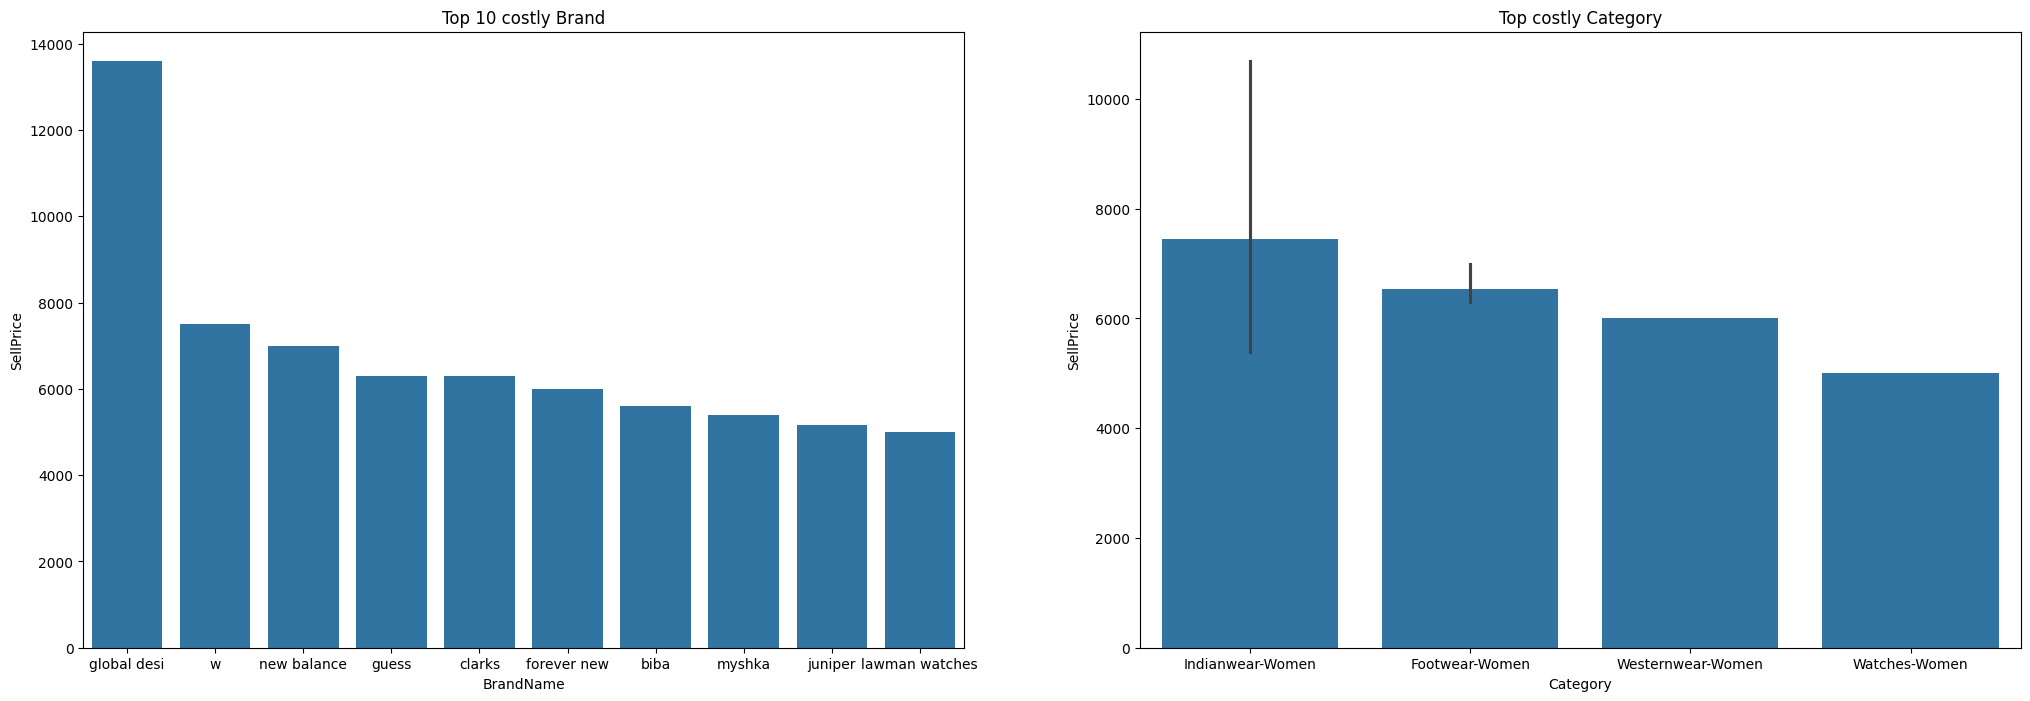

In [ ]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().reset_index().sort_values(by='SellPrice',ascending=False).head(10)
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Top 10 costly Brand')
sns.barplot(x='BrandName' , y='SellPrice' ,data=max_price)

plt.subplot(1,2,2)
plt.title('Top costly Category')
sns.barplot(x='Category' , y='SellPrice' ,data=max_price)


plt.show()

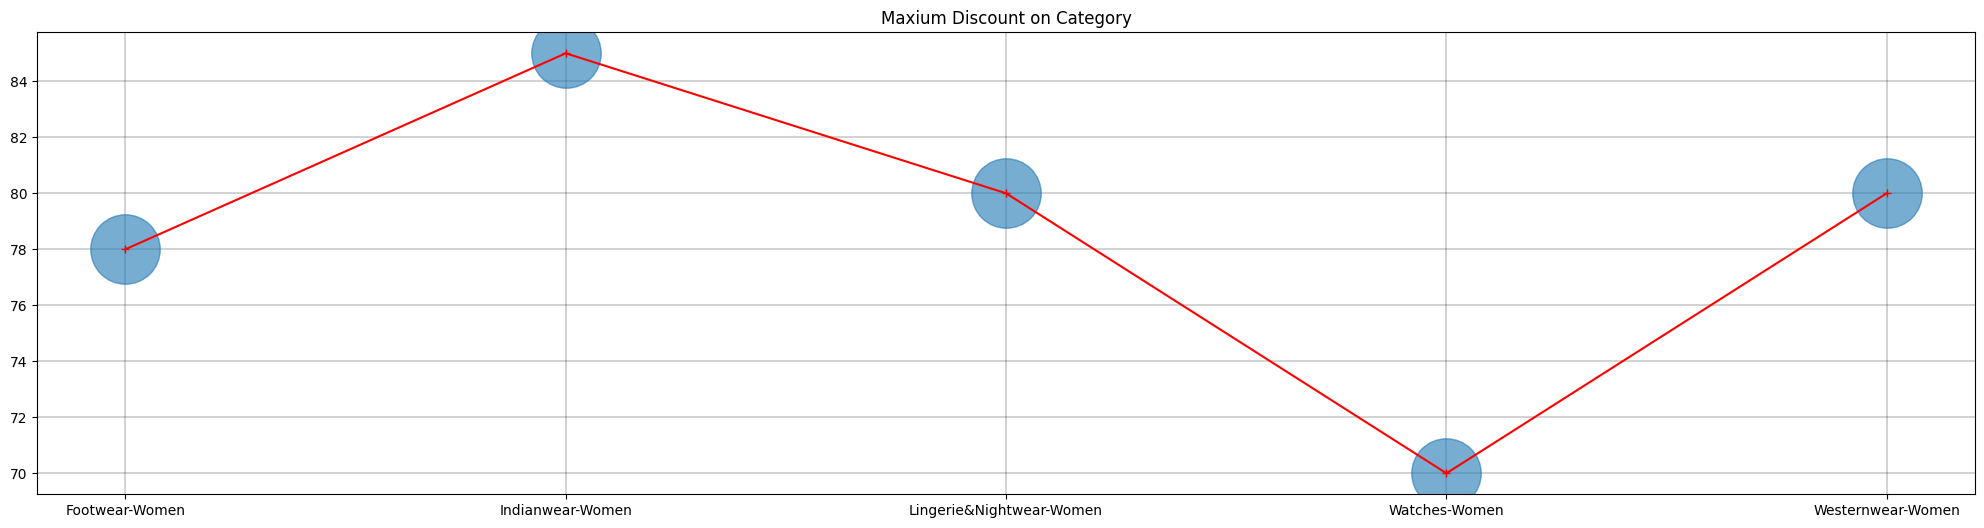

In [ ]:
plt.figure(figsize=(25,6))
plt.title('Maxium Discount on Category')
Dis=df.groupby(['Category'])['Discount'].max()
plt.grid(color='black',linewidth = 0.25)
plt.plot(Dis,'.', alpha=0.6, markersize=50,marker='o')
plt.plot(Dis,color='red',marker='+')
plt.show()

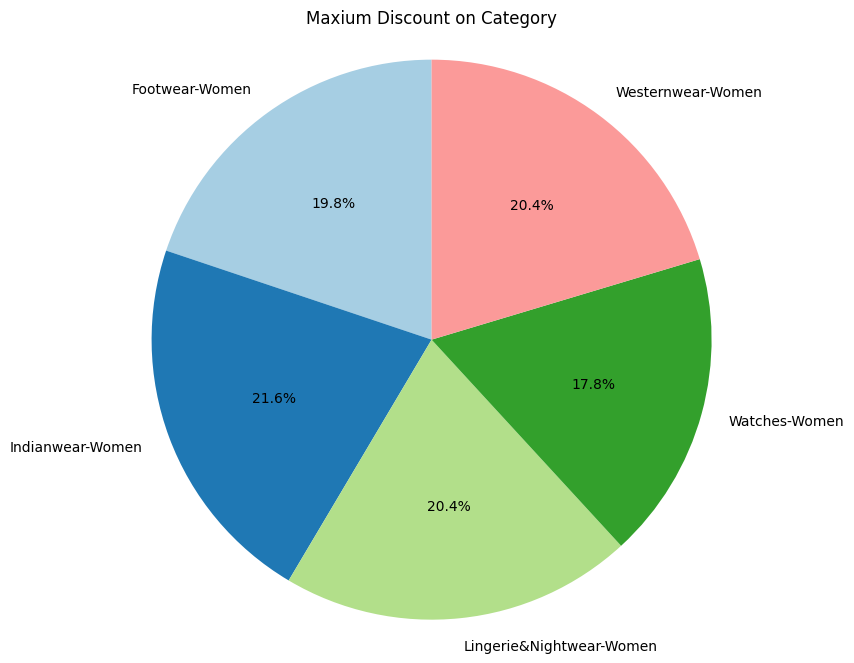

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


Dis = df.groupby(['Category'])['Discount'].max()


plt.figure(figsize=(10,8))
plt.title('Maxium Discount on Category')

plt.pie(Dis, labels=Dis.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.show()


<Axes: title={'center': 'BrandName and Discount'}, xlabel='BrandName,Discount'>

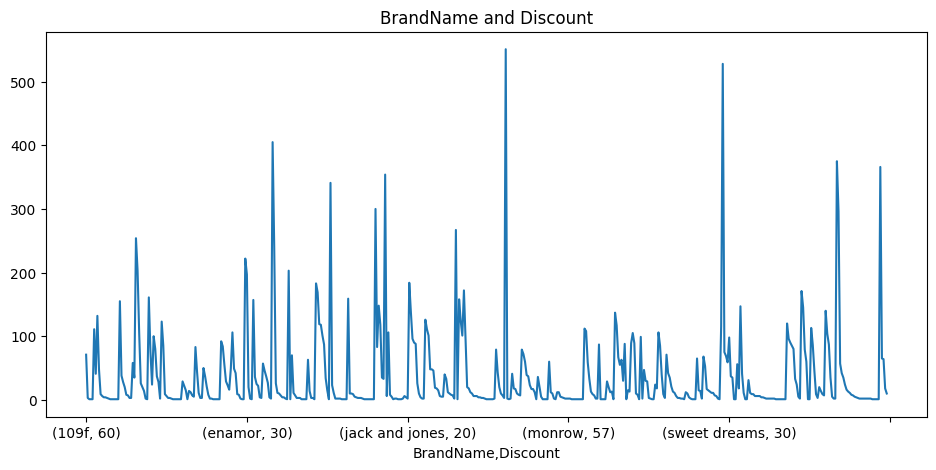

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title('BrandName and Discount')
df.groupby(['BrandName'])['Discount'].value_counts().plot()

## 2

In [ ]:
spark = SparkSession.builder.appName("FashionDatasetML").getOrCreate()

In [ ]:
import pandas as pd
file_path = '/content/FashionDataset.csv'
data_pd = pd.read_csv(file_path)

In [ ]:
df = spark.createDataFrame(data_pd)

In [ ]:
df = df.withColumn("MRP", regexp_replace(col("MRP"), "Rs\\n", "").cast("float"))
df = df.withColumn("SellPrice", col("SellPrice").cast("float"))

In [ ]:
df = df.withColumn("HighDiscount", when(col("Discount").like("%50%"), 1).otherwise(0))
df = df.na.drop(subset=["MRP", "SellPrice"])

In [ ]:
feature_columns = ["MRP", "SellPrice"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df).select("features", "HighDiscount")

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
rf = RandomForestClassifier(labelCol="HighDiscount", featuresCol="features")
gbt = GBTClassifier(labelCol="HighDiscount", featuresCol="features")
lr = LogisticRegression(labelCol="HighDiscount", featuresCol="features")
dt = DecisionTreeClassifier(labelCol="HighDiscount", featuresCol="features")

In [ ]:
models = {"Random Forest": rf, "Gradient Boosted Tree": gbt, "Logistic Regression": lr, "Decision Tree": dt}
results = {}

evaluator_auc = BinaryClassificationEvaluator(labelCol="HighDiscount", metricName="areaUnderROC")
evaluator_acc = MulticlassClassificationEvaluator(labelCol="HighDiscount", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="HighDiscount", metricName="f1")

def evaluate_model(model_name, model, train, test):
    fitted_model = model.fit(train)
    predictions = fitted_model.transform(test)
    auc = evaluator_auc.evaluate(predictions)
    accuracy = evaluator_acc.evaluate(predictions)
    f1 = evaluator_f1.evaluate(predictions)
    return {"AUC": auc, "Accuracy": accuracy, "F1": f1}

for name, model in models.items():
    results[name] = evaluate_model(name, model, train_data, test_data)

print(results)

{'Random Forest': {'AUC': 0.8432210892009026, 'Accuracy': 0.7556663644605621, 'F1': 0.7340241591144843}, 'Gradient Boosted Tree': {'AUC': 0.9711478910222009, 'Accuracy': 0.914324569356301, 'F1': 0.9144806281862412}, 'Logistic Regression': {'AUC': 0.6475836637177336, 'Accuracy': 0.6604714415231188, 'F1': 0.547537702515518}, 'Decision Tree': {'AUC': 0.688746732224165, 'Accuracy': 0.7239347234814143, 'F1': 0.6948179332518096}}


In [ ]:
param_grid_rf = ParamGridBuilder()\
    .addGrid(rf.numTrees, [10, 50, 100])\
    .addGrid(rf.maxDepth, [5, 10, 20])\
    .build()

cv_rf = CrossValidator(estimator=rf, estimatorParamMaps=param_grid_rf,
                       evaluator=evaluator_auc, numFolds=3)
best_rf = cv_rf.fit(train_data)
best_rf_model = best_rf.bestModel

In [ ]:
param_grid_gbt = ParamGridBuilder()\
    .addGrid(gbt.maxIter, [10, 50, 100])\
    .addGrid(gbt.maxDepth, [5, 10, 20])\
    .build()

cv_gbt = CrossValidator(estimator=gbt, estimatorParamMaps=param_grid_gbt,
                        evaluator=evaluator_auc, numFolds=3)
best_gbt = cv_gbt.fit(train_data)
best_gbt_model = best_gbt.bestModel

In [ ]:
final_rf_predictions = best_rf_model.transform(test_data)
final_gbt_predictions = best_gbt_model.transform(test_data)

final_rf_auc = evaluator_auc.evaluate(final_rf_predictions)
final_gbt_auc = evaluator_auc.evaluate(final_gbt_predictions)

print("\nFinal Model AUC Scores:")
print(f"Random Forest: {final_rf_auc}")
print(f"Gradient Boosted Tree: {final_gbt_auc}")


Final Model AUC Scores:
Random Forest: 0.9943490128864343
Gradient Boosted Tree: 0.9959349734249754
